In [1]:
# Импорт необходимых библиотек
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/game_ds/high_diamond_ranked_10min.csv", sep = ",")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# data = pd.read_csv("high_diamond_ranked_10min.csv", sep = ",")

# Анализ и предобработка

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [6]:
data.isnull().sum()

,0
gameId,0
blueWins,0
blueWardsPlaced,0
blueWardsDestroyed,0
blueFirstBlood,0
blueKills,0
blueDeaths,0
blueAssists,0
blueEliteMonsters,0
blueDragons,0


array([[<Axes: title={'center': 'gameId'}>,
        <Axes: title={'center': 'blueWins'}>,
        <Axes: title={'center': 'blueWardsPlaced'}>,
        <Axes: title={'center': 'blueWardsDestroyed'}>,
        <Axes: title={'center': 'blueFirstBlood'}>,
        <Axes: title={'center': 'blueKills'}>],
       [<Axes: title={'center': 'blueDeaths'}>,
        <Axes: title={'center': 'blueAssists'}>,
        <Axes: title={'center': 'blueEliteMonsters'}>,
        <Axes: title={'center': 'blueDragons'}>,
        <Axes: title={'center': 'blueHeralds'}>,
        <Axes: title={'center': 'blueTowersDestroyed'}>],
       [<Axes: title={'center': 'blueTotalGold'}>,
        <Axes: title={'center': 'blueAvgLevel'}>,
        <Axes: title={'center': 'blueTotalExperience'}>,
        <Axes: title={'center': 'blueTotalMinionsKilled'}>,
        <Axes: title={'center': 'blueTotalJungleMinionsKilled'}>,
        <Axes: title={'center': 'blueGoldDiff'}>],
       [<Axes: title={'center': 'blueExperienceDiff'}>,
  

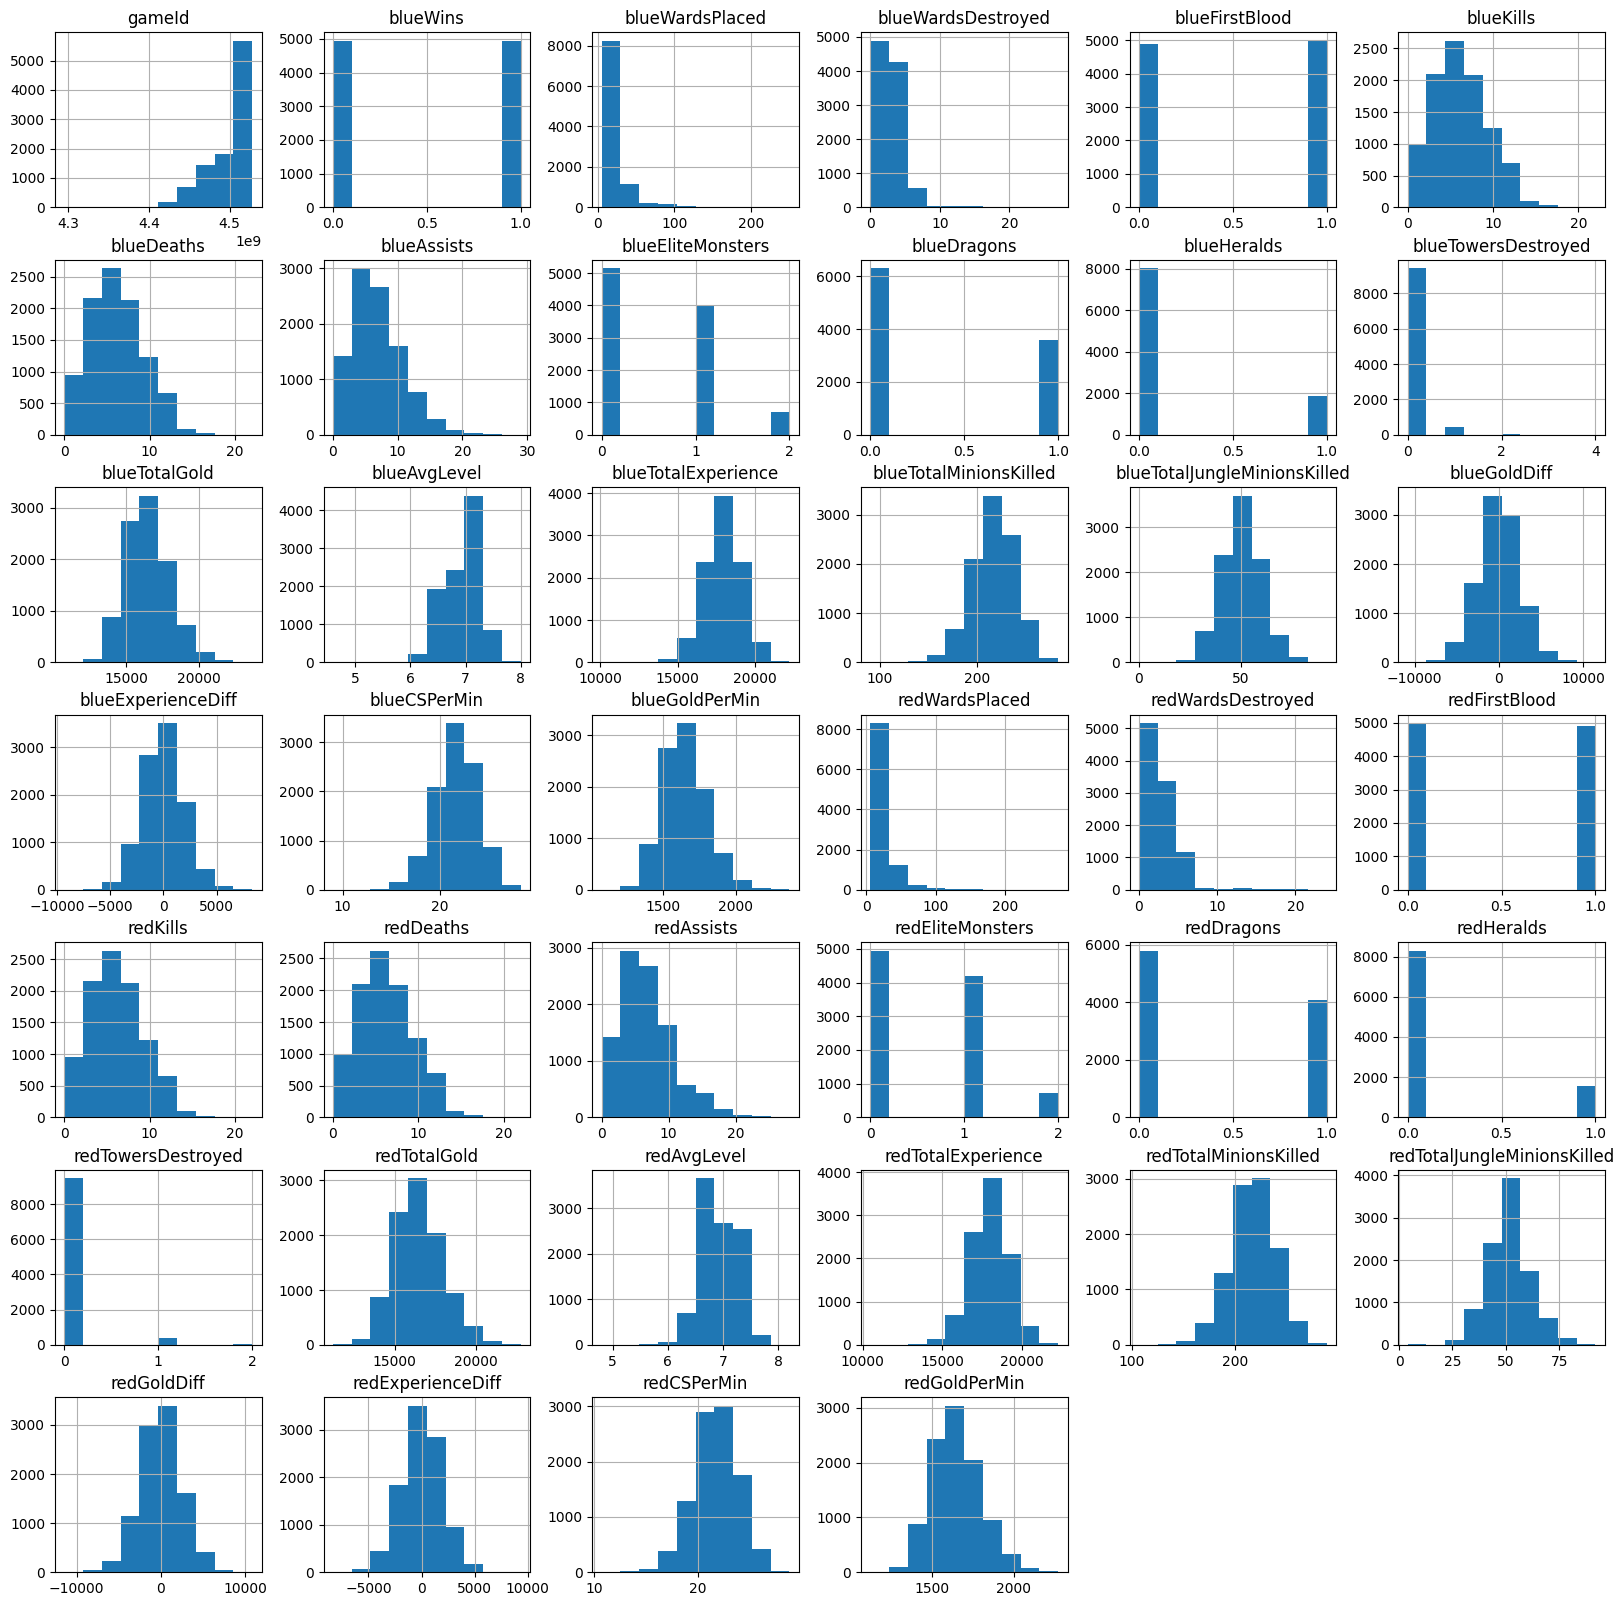

In [7]:
data.hist(figsize = (20,20))

In [8]:
data["blueWins"].value_counts(normalize=True) * 100

,proportion
blueWins,
0,50.096164
1,49.903836


Text(0.5, 1.0, 'Корреляционная матрица')

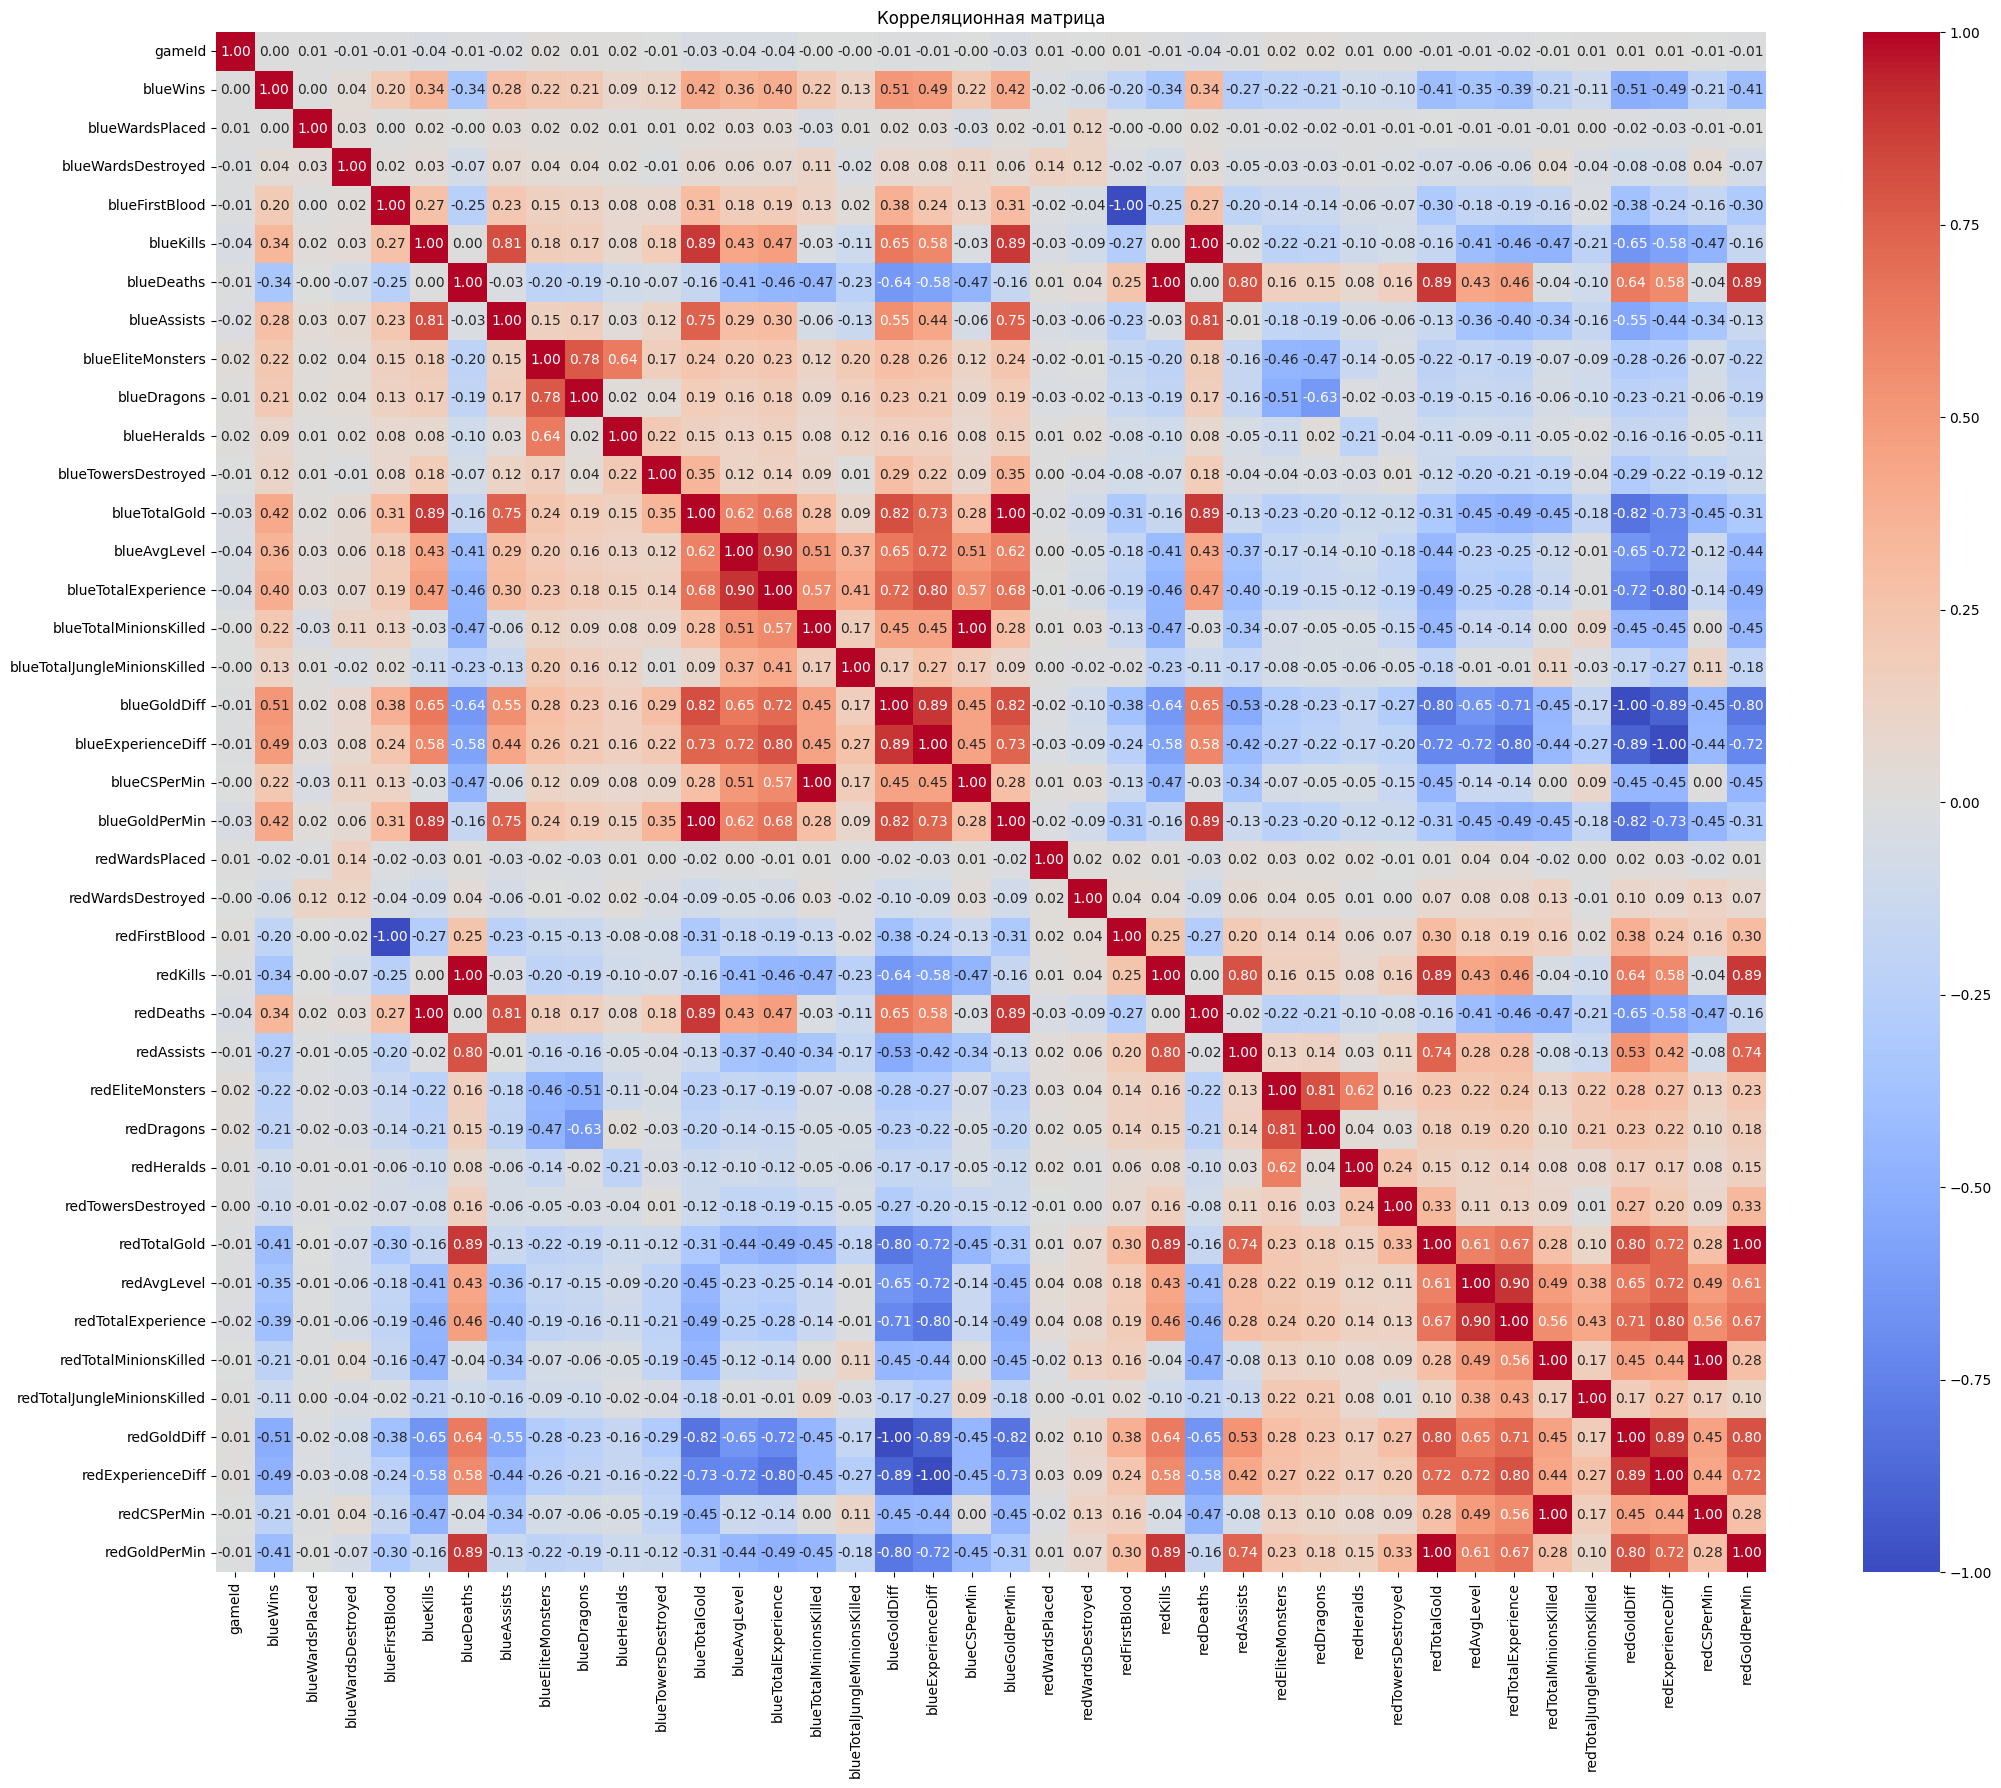

In [9]:
# Корреляционный анализ
correlation_matrix = data.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица')

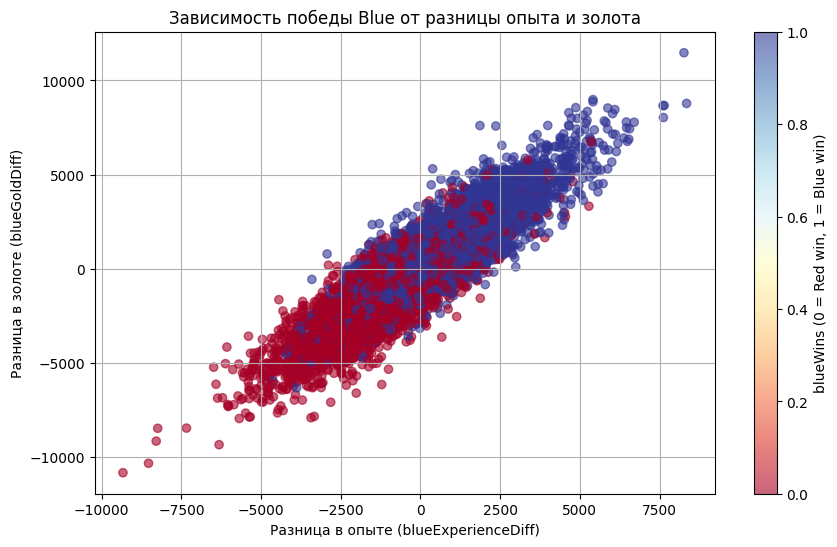

In [10]:
# Создание графика
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['blueExperienceDiff'],
    data['blueGoldDiff'],
    c=data['blueWins'],
    cmap='RdYlBu',
    alpha=0.6
)

# Оформление
plt.colorbar(label='blueWins (0 = Red win, 1 = Blue win)')
plt.xlabel('Разница в опыте (blueExperienceDiff)')
plt.ylabel('Разница в золоте (blueGoldDiff)')
plt.title('Зависимость победы Blue от разницы опыта и золота')
plt.grid(True)
plt.show()

In [11]:
# Предобработка данных
X = data.drop(columns=['gameId', 'blueWins','blueGoldDiff','blueExperienceDiff'])
y = (data['blueWins'] == 1).astype(int)  # Победа первой команды — 1, иначе — 0

In [12]:
# Деление на обучающую и тестовую выборки
X_tset, X_test, y_tset, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tset, y_tset, test_size=0.25, random_state=42)  # 20% в валидацию (0.25 от 0.8)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [13]:
# Преобразование в тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)


# Модели, обучение, тестирование

In [14]:
class Net(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

class Net1(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

class Net2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

class Net3(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

class ImprovedNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

class ImprovedNetV2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

In [15]:
def train(model_class, X_train, y_train, X_val, y_val, X_test, y_test, epochs=50, patience=3):
    model = model_class()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_val_loss = float("inf")
    best_weights = None
    trigger = 0
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            train_acc = accuracy_score(y_train.numpy(), (output.numpy() >= 0.5).astype(int))
            val_acc = accuracy_score(y_val.numpy(), (val_output.numpy() >= 0.5).astype(int))

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_weights = model.state_dict()
            trigger = 0
        else:
            trigger += 1
            if trigger >= patience:
                break

    end_time = time.time()
    model.load_state_dict(best_weights)

    # Оценка на тесте
    model.eval()
    with torch.no_grad():
        y_pred = (model(X_test) >= 0.5).int().numpy()

    return model, train_losses, val_losses, train_accs, val_accs, end_time - start_time, y_pred


Архитектура: Net
Время обучения: 0.22 сек
Валидационная точность: 0.7136
Точность (тест): 0.7252
ROC AUC (тест): 0.8062
Отчёт по метрикам (тестовая выборка):
                    precision    recall  f1-score   support

Победа красных (0)       0.78      0.63      0.70       983
   Победа синих(1)       0.69      0.82      0.75       993

          accuracy                           0.73      1976
         macro avg       0.73      0.72      0.72      1976
      weighted avg       0.73      0.73      0.72      1976



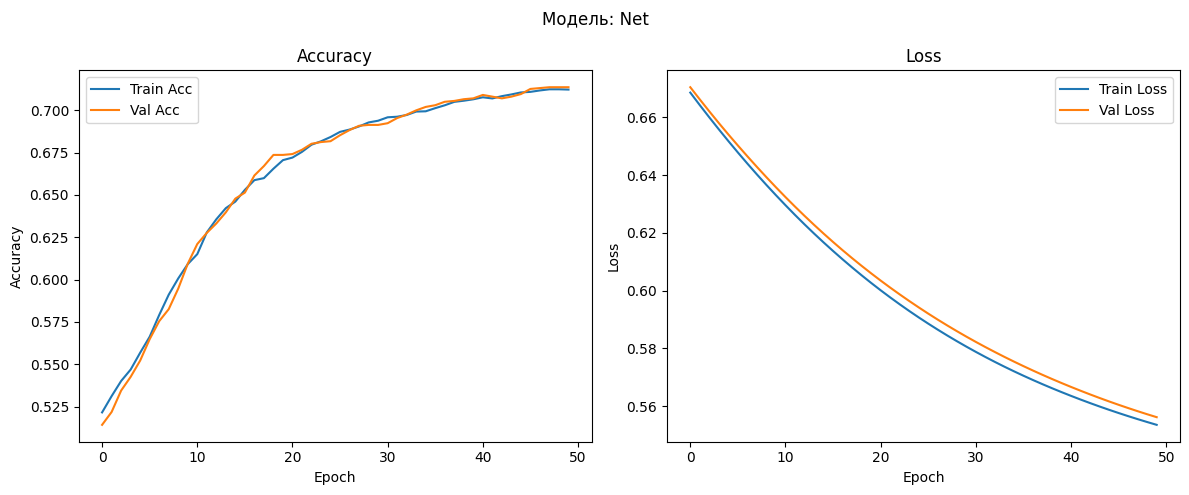

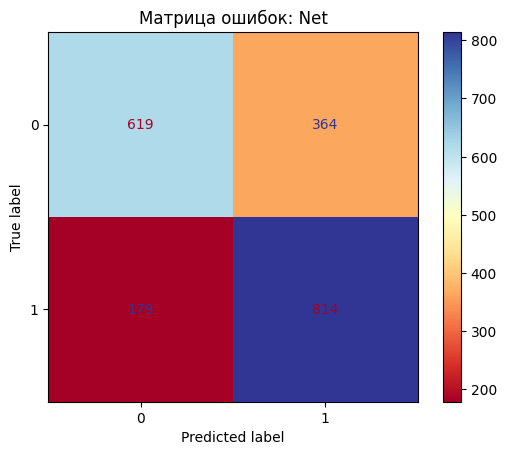

Архитектура: Net1
Время обучения: 0.36 сек
Валидационная точность: 0.7232
Точность (тест): 0.7358
ROC AUC (тест): 0.8130
Отчёт по метрикам (тестовая выборка):
                    precision    recall  f1-score   support

Победа красных (0)       0.73      0.75      0.74       983
   Победа синих(1)       0.75      0.72      0.73       993

          accuracy                           0.74      1976
         macro avg       0.74      0.74      0.74      1976
      weighted avg       0.74      0.74      0.74      1976



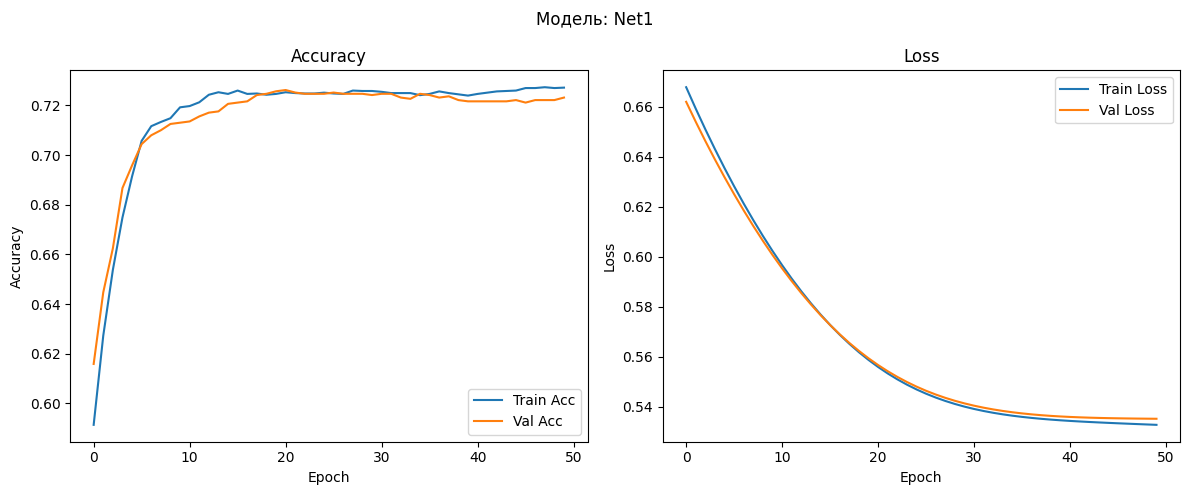

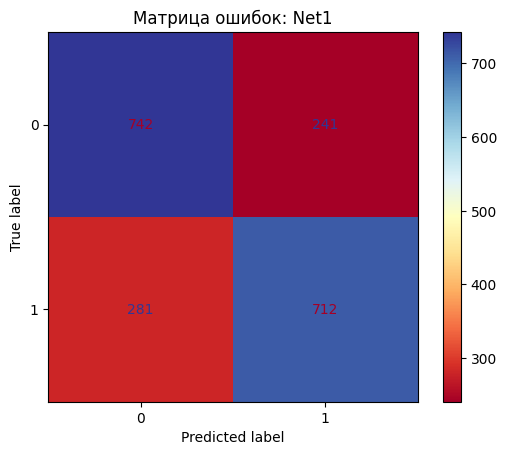

Архитектура: Net2
Время обучения: 0.58 сек
Валидационная точность: 0.7227
Точность (тест): 0.7358
ROC AUC (тест): 0.8138
Отчёт по метрикам (тестовая выборка):
                    precision    recall  f1-score   support

Победа красных (0)       0.74      0.73      0.73       983
   Победа синих(1)       0.74      0.74      0.74       993

          accuracy                           0.74      1976
         macro avg       0.74      0.74      0.74      1976
      weighted avg       0.74      0.74      0.74      1976



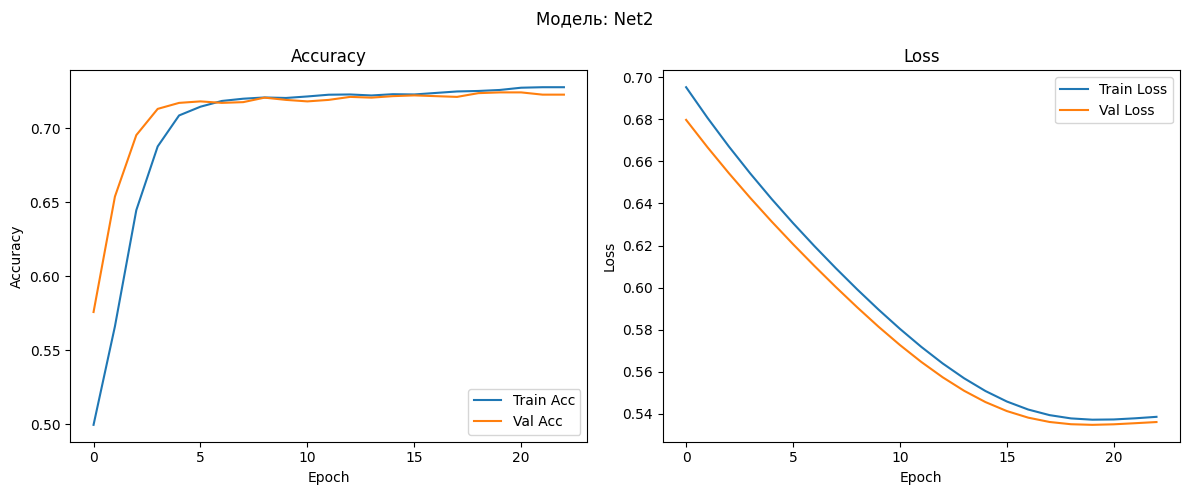

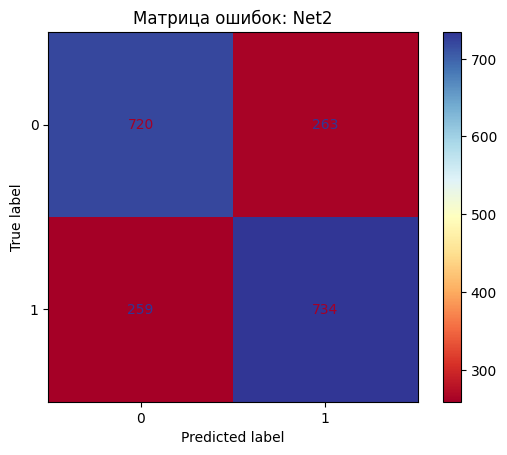

Архитектура: Net3
Время обучения: 1.10 сек
Валидационная точность: 0.7282
Точность (тест): 0.7333
ROC AUC (тест): 0.8132
Отчёт по метрикам (тестовая выборка):
                    precision    recall  f1-score   support

Победа красных (0)       0.73      0.73      0.73       983
   Победа синих(1)       0.73      0.74      0.74       993

          accuracy                           0.73      1976
         macro avg       0.73      0.73      0.73      1976
      weighted avg       0.73      0.73      0.73      1976



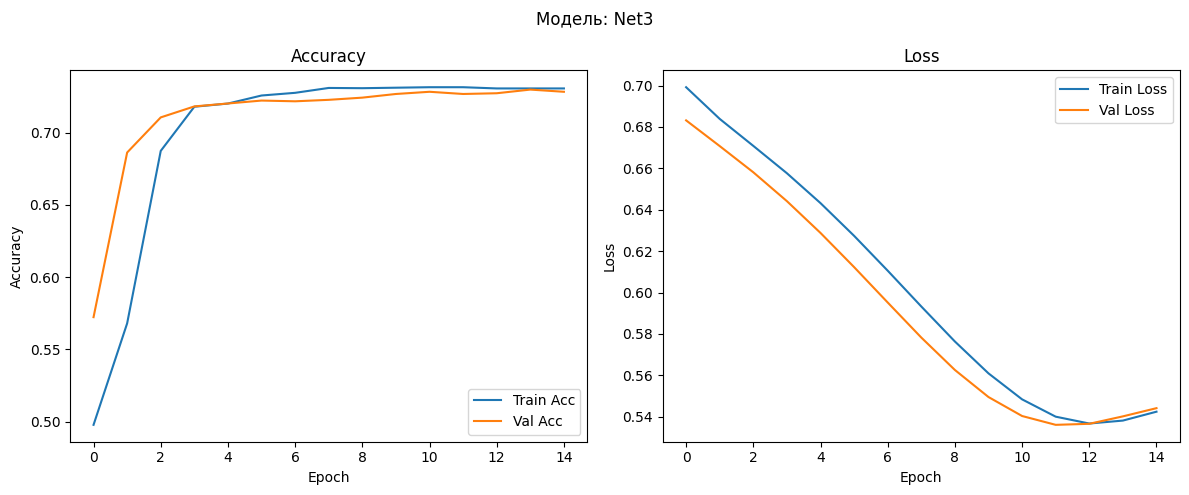

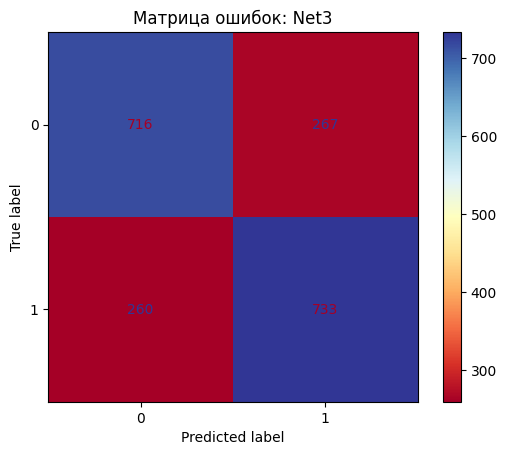

In [16]:
# Обучение
models = [Net, Net1, Net2, Net3]
names = ["Net", "Net1", "Net2", "Net3"]
input_dim = X_train.shape[1]

# Словари для хранения метрик
all_train_accs = {}
all_val_accs = {}
all_train_losses = {}
all_val_losses = {}

for name, model_class in zip(names, models):
    model_init = lambda: model_class(input_dim)
    model, train_losses, val_losses, train_accs, val_accs, train_time, y_pred = train(
        model_init, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor
    )

    # История метрик при обучении
    all_train_accs[name] = train_accs
    all_val_accs[name] = val_accs
    all_train_losses[name] = train_losses
    all_val_losses[name] = val_losses

    print(f"Архитектура: {name}")
    print(f"Время обучения: {train_time:.2f} сек")
    print(f"Валидационная точность: {val_accs[-1]:.4f}")

    # Предсказание вероятностей и меток
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        y_pred = (test_output >= 0.5).int().numpy()
        y_proba = test_output.detach().numpy()

    # Вывод точности по тестовой выборке
    test_acc = accuracy_score(y_test_tensor.numpy(), y_pred)
    print(f"Точность (тест): {test_acc:.4f}")

    # Расчёт ROC AUC
    roc_auc = roc_auc_score(y_test_tensor.numpy(), y_proba)
    print(f"ROC AUC (тест): {roc_auc:.4f}")
    print("Отчёт по метрикам (тестовая выборка):")
    print(classification_report(y_test, y_pred, target_names=["Победа красных (0)", "Победа синих(1)"]))

    # Визуализация
    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Модель: {name}")

    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="RdYlBu", values_format="d")
    plt.title(f"Матрица ошибок: {name}")
    plt.show()


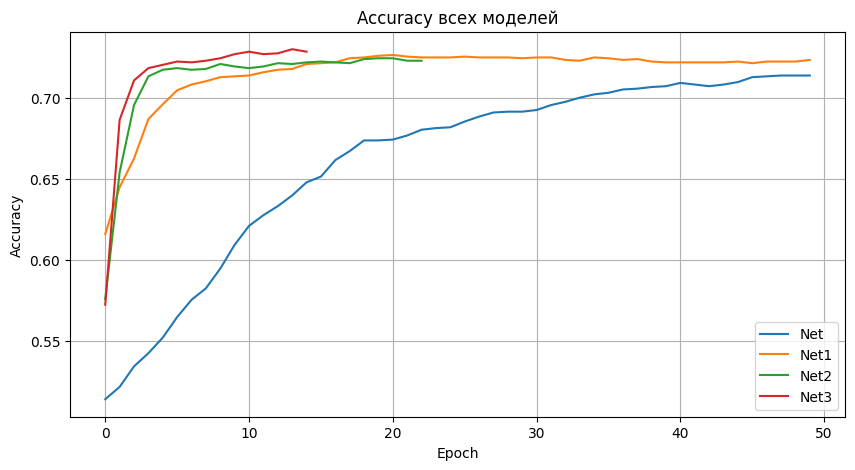

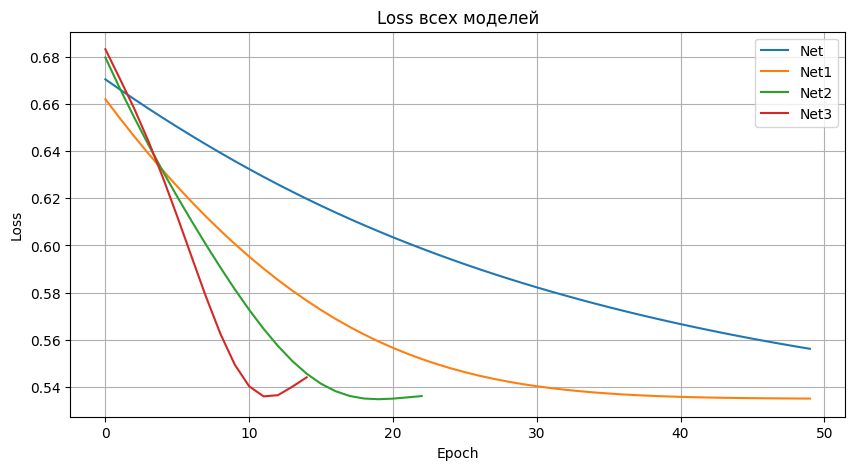

In [17]:
# Общий график точности
plt.figure(figsize=(10, 5))
plt.title("Accuracy всех моделей")
for name, accs in all_val_accs.items():
    plt.plot(accs, label=name)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Общий график потерь
plt.figure(figsize=(10, 5))
plt.title("Loss всех моделей")
for name, losses in all_val_losses.items():
    plt.plot(losses, label=name)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# Улучшение модели Net


In [18]:
def train_improved(model_class, X_train, y_train, X_val, y_val, X_test, y_test, epochs=50, patience=3):
    model = model_class()
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)

    best_val_loss = float("inf")
    best_weights = None
    trigger = 0
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)

            train_preds = torch.sigmoid(output)
            val_preds = torch.sigmoid(val_output)

            train_acc = accuracy_score(y_train.numpy(), (train_preds.numpy() >= 0.5).astype(int))
            val_acc = accuracy_score(y_val.numpy(), (val_preds.numpy() >= 0.5).astype(int))

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_weights = model.state_dict()
            trigger = 0
        else:
            trigger += 1
            if trigger >= patience:
                break

    end_time = time.time()
    model.load_state_dict(best_weights)

    model.eval()
    with torch.no_grad():
        test_output = torch.sigmoid(model(X_test))
        y_pred = (test_output >= 0.5).int().numpy()
        y_proba = test_output.detach().numpy()

    return model, train_losses, val_losses, train_accs, val_accs, end_time - start_time, y_pred, y_proba


Архитектура: ImprovedNet
Время обучения: 0.12 сек
Валидационная точность: 0.7227
Точность (тест): 0.7287
ROC AUC (тест): 0.8110
Отчёт по метрикам (тестовая выборка):
                    precision    recall  f1-score   support

Победа красных (0)       0.73      0.73      0.73       983
   Победа синих(1)       0.73      0.73      0.73       993

          accuracy                           0.73      1976
         macro avg       0.73      0.73      0.73      1976
      weighted avg       0.73      0.73      0.73      1976



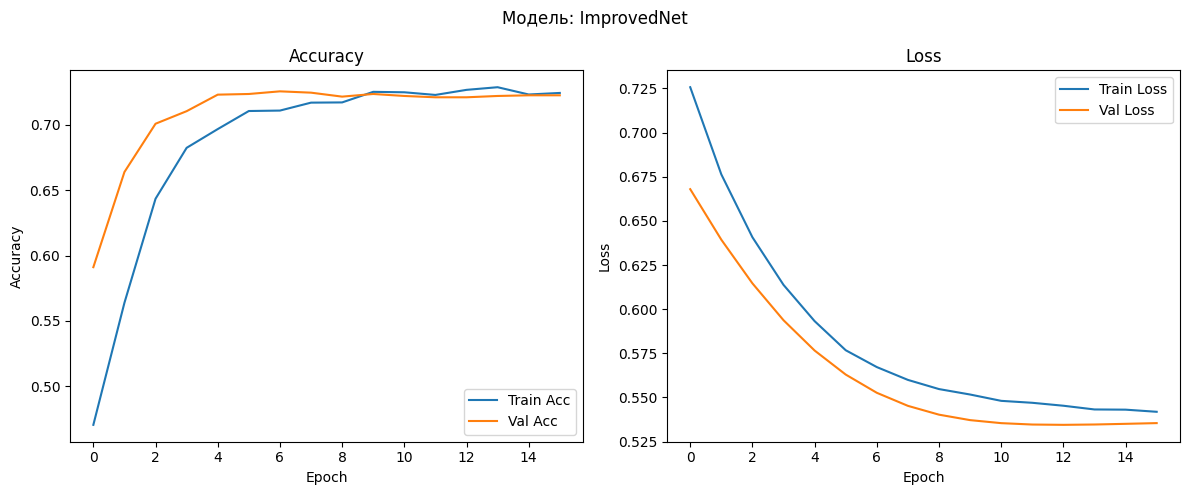

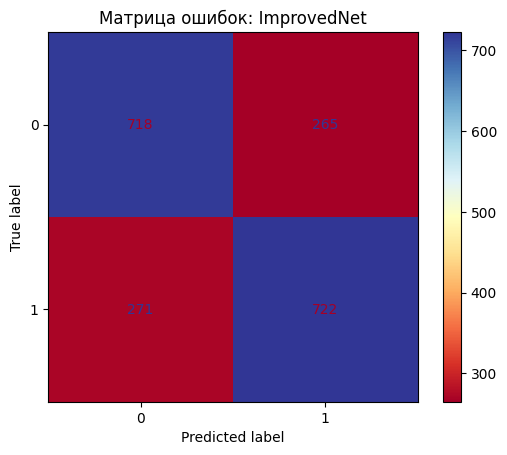

Архитектура: ImprovedNetV2
Время обучения: 0.20 сек
Валидационная точность: 0.7212
Точность (тест): 0.7338
ROC AUC (тест): 0.8138
Отчёт по метрикам (тестовая выборка):
                    precision    recall  f1-score   support

Победа красных (0)       0.72      0.75      0.74       983
   Победа синих(1)       0.75      0.72      0.73       993

          accuracy                           0.73      1976
         macro avg       0.73      0.73      0.73      1976
      weighted avg       0.73      0.73      0.73      1976



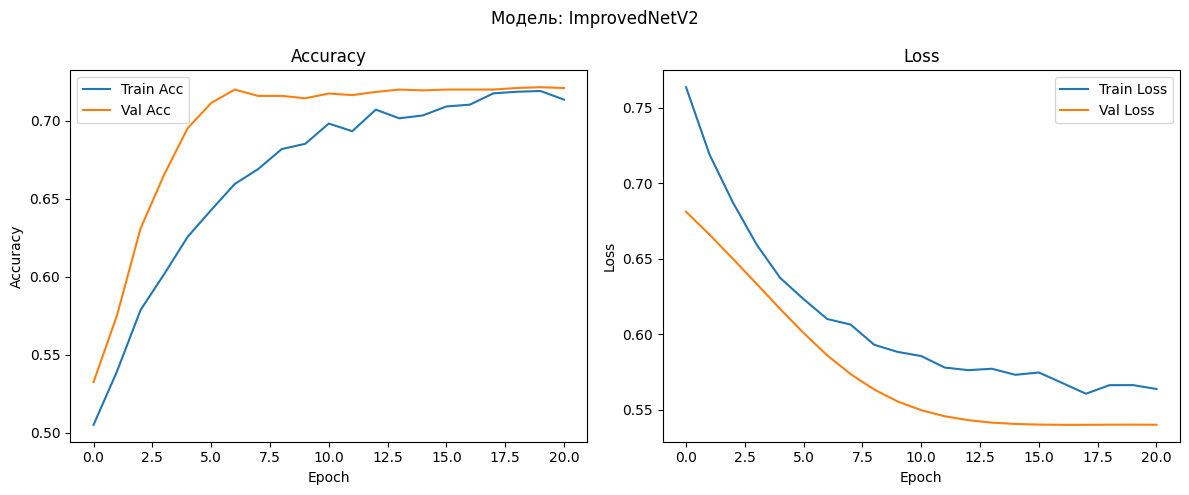

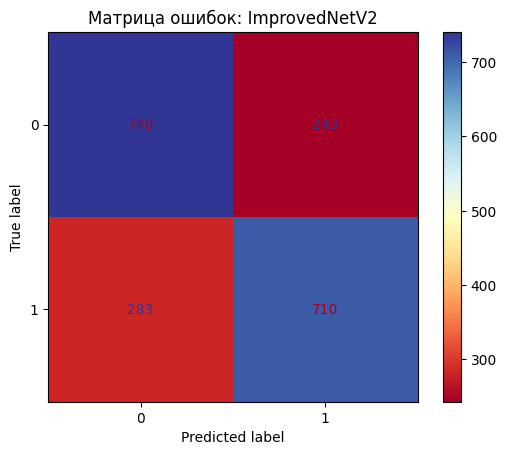

In [20]:
models = [ImprovedNet, ImprovedNetV2]
names = ["ImprovedNet", "ImprovedNetV2"]

all_train_accs = {}
all_val_accs = {}
all_train_losses = {}
all_val_losses = {}

for name, model_class in zip(names, models):
    model_init = lambda: model_class(input_dim)
    model, train_losses, val_losses, train_accs, val_accs, train_time, y_pred, y_proba = train_improved(
        model_init, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor
    )

    all_train_accs[name] = train_accs
    all_val_accs[name] = val_accs
    all_train_losses[name] = train_losses
    all_val_losses[name] = val_losses

    print(f"Архитектура: {name}")
    print(f"Время обучения: {train_time:.2f} сек")
    print(f"Валидационная точность: {val_accs[-1]:.4f}")

    test_acc = accuracy_score(y_test_tensor.numpy(), y_pred)
    print(f"Точность (тест): {test_acc:.4f}")

    roc_auc = roc_auc_score(y_test_tensor.numpy(), y_proba)
    print(f"ROC AUC (тест): {roc_auc:.4f}")

    print("Отчёт по метрикам (тестовая выборка):")
    print(classification_report(y_test_tensor.numpy(), y_pred, target_names=["Победа красных (0)", "Победа синих(1)"]))

    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Модель: {name}")

    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

    cm = confusion_matrix(y_test_tensor.numpy(), y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="RdYlBu", values_format="d")
    plt.title(f"Матрица ошибок: {name}")
    plt.show()
